In [10]:
import os
import pandas as pd
import seaborn as sbn

In [11]:
CONFIG = {
    'data_path' : "../fold_1",
    'csv_name' : 'train.csv',
    'label_info_name' : 'label_info.csv',
}

In [12]:
train_df = pd.read_csv(os.path.join(CONFIG['data_path'], CONFIG['csv_name']))

# label info를 읽습니다.
label_info_df = pd.read_csv(os.path.join(CONFIG['data_path'], CONFIG['label_info_name']))

print(train_df.head())

                             img_path  label description
0            ../fold_1\val\가구수정\0.png      0        가구수정
1  ../fold_1\val\가구수정\01111ccasa3.png      0        가구수정
2  ../fold_1\val\가구수정\01111ccasa4.png      0        가구수정
3     ../fold_1\val\가구수정\01abcca3.png      0        가구수정
4     ../fold_1\val\가구수정\01abcca4.png      0        가구수정


In [13]:
keys = label_info_df['description'].values
counts = [sum(train_df['description'] == key) for key in keys]
train_df['dens'] = [counts[label] for label in train_df['label'].values]
train_df.sort_values(by=['dens', 'img_path'], inplace=True)

In [14]:
sbn.set(font="Malgun gothic", 
        rc={"axes.unicode_minus":False,
            "figure.figsize":(11.7,8.27),
            },
        style='whitegrid')

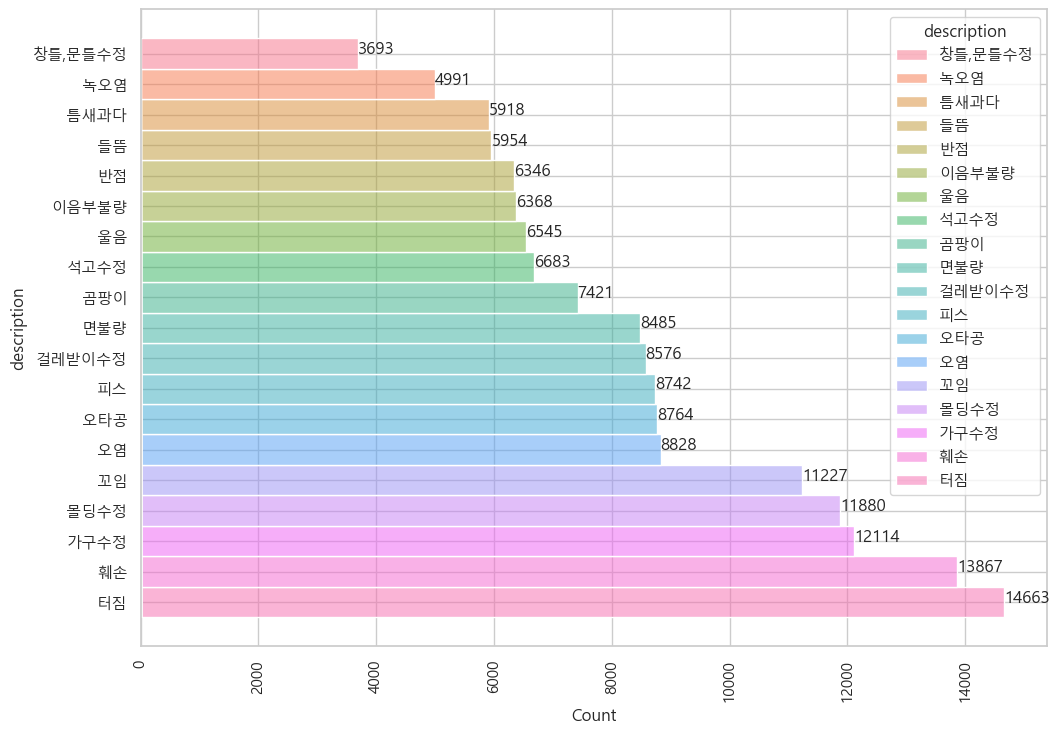

In [15]:
axes = sbn.histplot(data=train_df,y='description', hue='description', discrete=True, element="bars", stat='count', kde=False,)
axes.tick_params(axis='x', rotation=90)
for i, container in enumerate(axes.containers):
    values = container.datavalues.tolist()
    x = max(values)
    y = values.index(x)
    axes.text(x, y, x)